In [1]:
%pip install pyautogen matplotlib yfinance


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.display import Image, display

import autogen
from autogen.coding import LocalCommandLineCodeExecutor

config_list = autogen.config_list_from_json(
    env_or_file="OAI_CONFIG_LIST.json",
)

/home/andy/works/openai/autogen_sample/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config={
        "config_list": config_list,
        "temperature": 0, 
    }, 
    system_message="당신은 파이썬 코드를 전문적으로 만드는 에이전트입니다. 코드를 생성하고 오류가 있으면 수정하세요. ",
)


user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        # the executor to run the generated code
        "executor": LocalCommandLineCodeExecutor(work_dir="coding1"),
    },
)

chat_res = user_proxy.initiate_chat(
    assistant,
    message="""오늘은 며칠인가요? META와 TESLA의 연간 누적 수익률을 비교하세요.""",
    summary_method="reflection_with_llm",
)

user_proxy (to assistant):

오늘은 며칠인가요? META와 TESLA의 연간 누적 수익률을 비교하세요.

--------------------------------------------------------------------------------


assistant (to user_proxy):

오늘 날짜를 확인하고 META와 TESLA의 연간 누적 수익률을 비교하는 파이썬 코드를 작성해보겠습니다. 이를 위해 `yfinance` 라이브러리를 사용하여 주식 데이터를 가져오고, `pandas`와 `datetime` 라이브러리를 사용하여 데이터를 처리하겠습니다.

먼저 필요한 라이브러리를 설치해야 합니다. 터미널이나 주피터 노트북에서 다음 명령어를 실행하세요:
```sh
pip install yfinance pandas
```

이제 파이썬 코드를 작성해보겠습니다:

```python
import yfinance as yf
import pandas as pd
from datetime import datetime

# 오늘 날짜를 확인합니다.
today = datetime.today().strftime('%Y-%m-%d')
print(f"오늘은 {today}입니다.")

# 연초 날짜를 설정합니다.
start_date = f"{datetime.today().year}-01-01"

# META와 TSLA의 주식 데이터를 가져옵니다.
meta = yf.Ticker("META")
tesla = yf.Ticker("TSLA")

# 연초부터 오늘까지의 주식 데이터를 다운로드합니다.
meta_data = meta.history(start=start_date, end=today)
tesla_data = tesla.history(start=start_date, end=today)

# 연초 대비 누적 수익률을 계산합니다.
meta_data['Cumulative Return'] = (meta_data['Close'] / meta_data['Close'].iloc[0]) - 1
tesla_data['Cumulative Return'] = (tesla_data['Close'] / tesla_data['Close'].iloc[0]) - 1

# 연초 대비 누적 수익률을 출력합니다.
print(f"META의 연초 대비 누적 수익

In [4]:
print("Chat history:", chat_res.chat_history)

print("Summary:", chat_res.summary)
print("Cost info:", chat_res.cost)

Chat history: [{'content': '오늘은 며칠인가요? META와 TESLA의 연간 누적 수익률을 비교하세요.', 'role': 'assistant'}, {'content': '오늘 날짜를 확인하고 META와 TESLA의 연간 누적 수익률을 비교하는 파이썬 코드를 작성해보겠습니다. 이를 위해 `yfinance` 라이브러리를 사용하여 주식 데이터를 가져오고, `pandas`와 `datetime` 라이브러리를 사용하여 데이터를 처리하겠습니다.\n\n먼저 필요한 라이브러리를 설치해야 합니다. 터미널이나 주피터 노트북에서 다음 명령어를 실행하세요:\n```sh\npip install yfinance pandas\n```\n\n이제 파이썬 코드를 작성해보겠습니다:\n\n```python\nimport yfinance as yf\nimport pandas as pd\nfrom datetime import datetime\n\n# 오늘 날짜를 확인합니다.\ntoday = datetime.today().strftime(\'%Y-%m-%d\')\nprint(f"오늘은 {today}입니다.")\n\n# 연초 날짜를 설정합니다.\nstart_date = f"{datetime.today().year}-01-01"\n\n# META와 TSLA의 주식 데이터를 가져옵니다.\nmeta = yf.Ticker("META")\ntesla = yf.Ticker("TSLA")\n\n# 연초부터 오늘까지의 주식 데이터를 다운로드합니다.\nmeta_data = meta.history(start=start_date, end=today)\ntesla_data = tesla.history(start=start_date, end=today)\n\n# 연초 대비 누적 수익률을 계산합니다.\nmeta_data[\'Cumulative Return\'] = (meta_data[\'Close\'] / meta_data[\'Close\'].iloc[0]) - 1\ntesla_data[\'Cumulati

In [5]:
user_proxy.send(
    recipient=assistant,
    message="""연간 주가 변동 차트를 플롯합니다. 데이터를 stock_price_ytd.csv에 저장하고 플롯을 stock_price_ytd.png에 저장합니다.""",
)

user_proxy (to assistant):

연간 주가 변동 차트를 플롯합니다. 데이터를 stock_price_ytd.csv에 저장하고 플롯을 stock_price_ytd.png에 저장합니다.

--------------------------------------------------------------------------------
assistant (to user_proxy):

연간 주가 변동 차트를 플롯하고 데이터를 CSV 파일에 저장하며, 플롯을 이미지 파일로 저장하는 코드를 작성해보겠습니다. 이를 위해 `pandas`를 사용하여 데이터를 CSV 파일로 저장하고, `matplotlib`를 사용하여 플롯을 이미지 파일로 저장하겠습니다.

다음은 전체 코드를 작성한 것입니다:

```python
import yfinance as yf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# 오늘 날짜를 확인합니다.
today = datetime.today().strftime('%Y-%m-%d')
print(f"오늘은 {today}입니다.")

# 연초 날짜를 설정합니다.
start_date = f"{datetime.today().year}-01-01"

# META와 TSLA의 주식 데이터를 가져옵니다.
meta = yf.Ticker("META")
tesla = yf.Ticker("TSLA")

# 연초부터 오늘까지의 주식 데이터를 다운로드합니다.
meta_data = meta.history(start=start_date, end=today)
tesla_data = tesla.history(start=start_date, end=today)

# 연초 대비 누적 수익률을 계산합니다.
meta_data['Cumulative Return'] = (meta_data['Close'] / meta_data['Close'].iloc[0]) - 1
tesla_dat

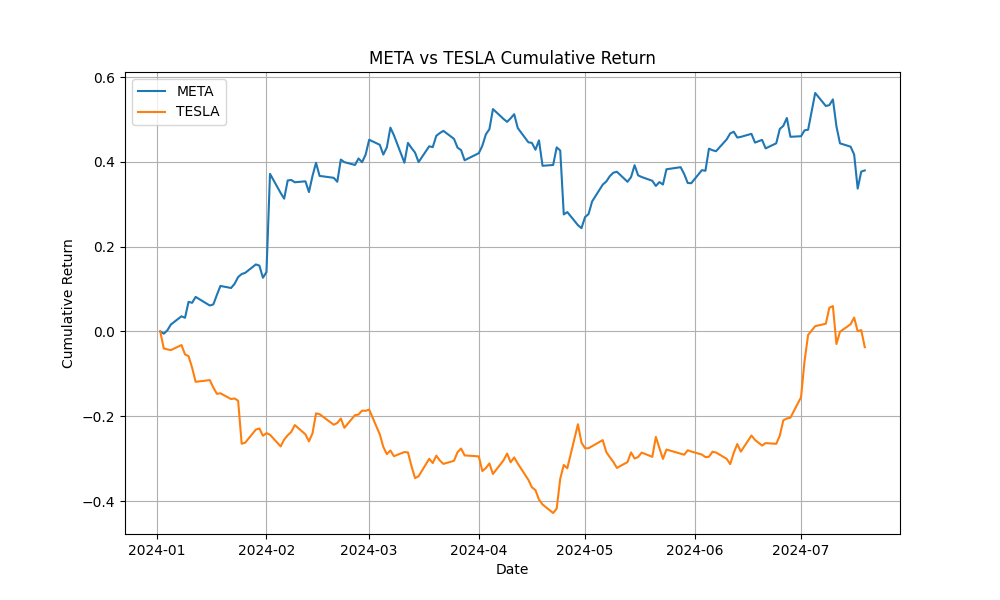

In [6]:
try:
    image = Image(filename="coding1/stock_price_ytd.png")
    display(image)
except FileNotFoundError:
    print("Image not found. Please check the file name and modify if necessary.")

In [7]:
# Path to your CSV file
file_path = "coding1/stock_price_ytd.csv"
try:
    with open(file_path, mode="r", encoding="utf-8") as file:
        # Read each line in the file
        for line in file:
            # Split the line into a list using the comma as a separator
            row = line.strip().split(",")
            # Print the list representing the current row
            print(row)
except FileNotFoundError:
    print("File not found. Please check the file name and modify if necessary.")

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Cumulative Return', 'Symbol']
['2024-01-02 00:00:00-05:00', '350.599548159297', '352.4357711788527', '339.31274424531915', '345.5798645019531', '19042200', '0.0', '0.0', '0.0', 'META']
['2024-01-03 00:00:00-05:00', '344.27254418678', '347.2364546857272', '342.47621725878497', '343.7635803222656', '15451100', '0.0', '0.0', '-0.00525575812209178', 'META']
['2024-01-04 00:00:00-05:00', '343.7935199027151', '347.4360286089438', '342.69576962625035', '346.40814208984375', '12099900', '0.0', '0.0', '0.0023967761810552712', 'META']
['2024-01-05 00:00:00-05:00', '346.2784209841403', '352.77508073132583', '345.5499374797681', '351.228271484375', '13920700', '0.0', '0.0', '0.01634472248712271', 'META']
['2024-01-08 00:00:00-05:00', '353.97262881201056', '358.24385059684556', '351.32803880361155', '357.92449951171875', '13890200', '0.0', '0.0', '0.03572151122738765', 'META']
['2024-01-09 00:00:00-05:00', '355.6691348

## Example Task: Use User Defined Message Function to let Agents Analyze data Collected

In [8]:
def my_message_generator(sender, recipient, context):
    # your CSV file
    file_name = context.get("file_name")
    try:
        with open(file_name, mode="r", encoding="utf-8") as file:
            file_content = file.read()
    except FileNotFoundError:
        file_content = "No data found."
    return "데이터를 분석하고 간단하지만 매력적인 블로그 게시물을 작성하세요.. \n Data: \n" + file_content


# followup of the previous question
chat_res = user_proxy.initiate_chat(
    recipient=assistant,
    message=my_message_generator,
    file_name="coding1/stock_price_ytd.csv",
    summary_method="reflection_with_llm",
    summary_args={"summary_prompt": "마크다운형태로 블로그 포스트를 한국어로 반환해줘"},
)



user_proxy (to assistant):

데이터를 분석하고 간단하지만 매력적인 블로그 게시물을 작성하세요.. 
 Data: 
Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Cumulative Return,Symbol
2024-01-02 00:00:00-05:00,350.599548159297,352.4357711788527,339.31274424531915,345.5798645019531,19042200,0.0,0.0,0.0,META
2024-01-03 00:00:00-05:00,344.27254418678,347.2364546857272,342.47621725878497,343.7635803222656,15451100,0.0,0.0,-0.00525575812209178,META
2024-01-04 00:00:00-05:00,343.7935199027151,347.4360286089438,342.69576962625035,346.40814208984375,12099900,0.0,0.0,0.0023967761810552712,META
2024-01-05 00:00:00-05:00,346.2784209841403,352.77508073132583,345.5499374797681,351.228271484375,13920700,0.0,0.0,0.01634472248712271,META
2024-01-08 00:00:00-05:00,353.97262881201056,358.24385059684556,351.32803880361155,357.92449951171875,13890200,0.0,0.0,0.03572151122738765,META
2024-01-09 00:00:00-05:00,355.6691348933328,359.900460759222,354.6312590633981,356.697021484375,13463900,0.0,0.0,0.0321695738796699,META
2024-01-10 00:00

In [9]:
print(chat_res.summary)



## 2024년 1월부터 7월까지 META와 TSLA 주식 데이터 분석

### 소개

이 블로그 포스트에서는 2024년 1월부터 7월까지 두 주요 기업인 META와 TSLA의 주식 성과를 분석합니다. 개장가와 종가, 거래량, 누적 수익률과 같은 주요 지표를 살펴보며 주가에 영향을 미친 트렌드와 중요한 사건들을 이해해보겠습니다.

### 데이터 개요

이 데이터셋은 META와 TSLA의 일일 주식 데이터를 포함하고 있으며, 날짜, 개장가, 최고가, 최저가, 종가, 거래량, 배당금, 주식 분할, 누적 수익률, 심볼 등의 열로 구성되어 있습니다.

### META 주식 분석

#### 2024년 1월

- **시작 가격**: META는 2024년 1월 2일에 $350.60의 개장가로 시작했습니다.
- **변동성**: 주가는 $339.31에서 $352.44 사이에서 변동했습니다.
- **종가**: 1월 말에는 2024년 1월 31일에 $389.34로 마감했습니다.
- **누적 수익률**: 1월의 누적 수익률은 약 11.05%였습니다.

#### 2024년 2월

- **상승세**: META는 2월에 큰 성장을 보였으며, 2024년 2월 2일에 $484.96의 최고가를 기록했습니다.
- **종가**: 2월 말에는 2024년 2월 29일에 $474.02로 마감했습니다.
- **누적 수익률**: 2월의 누적 수익률은 약 37.17%였습니다.

#### 2024년 3월

- **계속된 성장**: 주가는 2024년 3월 7일에 $519.33의 최고가를 기록하며 계속 성장했습니다.
- **종가**: META는 2024년 3월 28일에 $504.22로 마감했습니다.
- **누적 수익률**: 3월의 누적 수익률은 약 45.88%였습니다.

#### 2024년 4월

- **최고 성과**: META는 2024년 4월 5일에 $530.17의 최고 성과를 기록했습니다.
- **종가**: 4월 말에는 2024년 4월 11일에 $522.64로 마감했습니다.
- **누적 수익률**: 4월의

## 2024년 1월부터 7월까지 META와 TSLA 주식 데이터 분석

### 소개

이 블로그 포스트에서는 2024년 1월부터 7월까지 두 주요 기업인 META와 TSLA의 주식 성과를 분석합니다. 개장가와 종가, 거래량, 누적 수익률과 같은 주요 지표를 살펴보며 주가에 영향을 미친 트렌드와 중요한 사건들을 이해해보겠습니다.

### 데이터 개요

이 데이터셋은 META와 TSLA의 일일 주식 데이터를 포함하고 있으며, 날짜, 개장가, 최고가, 최저가, 종가, 거래량, 배당금, 주식 분할, 누적 수익률, 심볼 등의 열로 구성되어 있습니다.

### META 주식 분석

#### 2024년 1월

- **시작 가격**: META는 2024년 1월 2일에 $350.60의 개장가로 시작했습니다.
- **변동성**: 주가는 $339.31에서 $352.44 사이에서 변동했습니다.
- **종가**: 1월 말에는 2024년 1월 31일에 $389.34로 마감했습니다.
- **누적 수익률**: 1월의 누적 수익률은 약 11.05%였습니다.

#### 2024년 2월

- **상승세**: META는 2월에 큰 성장을 보였으며, 2024년 2월 2일에 $484.96의 최고가를 기록했습니다.
- **종가**: 2월 말에는 2024년 2월 29일에 $474.02로 마감했습니다.
- **누적 수익률**: 2월의 누적 수익률은 약 37.17%였습니다.
...

META와 TSLA 모두 2024년 1월부터 7월까지 주가에 큰 변동성을 보였습니다. META는 특히 상반기에 강한 성장과 회복을 보였으며, TSLA는 더 많은 변동성을 겪었지만 기간 말에 회복의 조짐을 보였습니다.

투자자들은 이러한 트렌드와 영향을 미치는 요인들을 고려하여 투자 결정을 내리는 것이 중요합니다. 항상 철저한 연구를 수행하고 금융 전문가와 상담한 후에 투자 결정을 내리는 것이 좋습니다.